In [202]:
import requests
import pandas as pd
from functools import reduce

In [51]:
url='https://jsonplaceholder.typicode.com/users'
users=requests.get(url)
users_json=users.json()
users_json


[{'id': 1,
  'name': 'Leanne Graham',
  'username': 'Bret',
  'email': 'Sincere@april.biz',
  'address': {'street': 'Kulas Light',
   'suite': 'Apt. 556',
   'city': 'Gwenborough',
   'zipcode': '92998-3874',
   'geo': {'lat': '-37.3159', 'lng': '81.1496'}},
  'phone': '1-770-736-8031 x56442',
  'website': 'hildegard.org',
  'company': {'name': 'Romaguera-Crona',
   'catchPhrase': 'Multi-layered client-server neural-net',
   'bs': 'harness real-time e-markets'}},
 {'id': 2,
  'name': 'Ervin Howell',
  'username': 'Antonette',
  'email': 'Shanna@melissa.tv',
  'address': {'street': 'Victor Plains',
   'suite': 'Suite 879',
   'city': 'Wisokyburgh',
   'zipcode': '90566-7771',
   'geo': {'lat': '-43.9509', 'lng': '-34.4618'}},
  'phone': '010-692-6593 x09125',
  'website': 'anastasia.net',
  'company': {'name': 'Deckow-Crist',
   'catchPhrase': 'Proactive didactic contingency',
   'bs': 'synergize scalable supply-chains'}},
 {'id': 3,
  'name': 'Clementine Bauch',
  'username': 'Samantha

In [52]:
users_df=pd.DataFrame(users_json)
for i in users_df:
    for x in range(len(users_df[i])):
        if i=='address':
            users_df[i][x]=f"{users_df[i][x]['street']}, {users_df[i][x]['suite']}, {users_df[i][x]['city']}, {users_df[i][x]['zipcode']}"
        if i=='company':
            users_df[i][x]=f"{users_df[i][x]['name']}"
users_df

,id,name,username,email,address,phone,website,company
0,1,Leanne Graham,Bret,Sincere@april.biz,"Kulas Light, Apt. 556, Gwenborough, 92998-3874",1-770-736-8031 x56442,hildegard.org,Romaguera-Crona
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"Victor Plains, Suite 879, Wisokyburgh, 90566-7771",010-692-6593 x09125,anastasia.net,Deckow-Crist
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"Douglas Extension, Suite 847, McKenziehaven, 5...",1-463-123-4447,ramiro.info,Romaguera-Jacobson
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"Hoeger Mall, Apt. 692, South Elvis, 53919-4257",493-170-9623 x156,kale.biz,Robel-Corkery
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"Skiles Walks, Suite 351, Roscoeview, 33263",(254)954-1289,demarco.info,Keebler LLC
5,6,Mrs. Dennis Schulist,Leopoldo_Corkery,Karley_Dach@jasper.info,"Norberto Crossing, Apt. 950, South Christy, 23...",1-477-935-8478 x6430,ola.org,Considine-Lockman
6,7,Kurtis Weissnat,Elwyn.Skiles,Telly.Hoeger@billy.biz,"Rex Trail, Suite 280, Howemouth, 58804-1099",210.067.6132,elvis.io,Johns Group
7,8,Nicholas Runolfsdottir V,Maxime_Nienow,Sherwood@rosamond.me,"Ellsworth Summit, Suite 729, Aliyaview, 45169",586.493.6943 x140,jacynthe.com,Abernathy Group
8,9,Glenna Reichert,Delphine,Chaim_McDermott@dana.io,"Dayna Park, Suite 449, Bartholomebury, 76495-3109",(775)976-6794 x41206,conrad.com,Yost and Sons
9,10,Clementina DuBuque,Moriah.Stanton,Rey.Padberg@karina.biz,"Kattie Turnpike, Suite 198, Lebsackbury, 31428...",024-648-3804,ambrose.net,Hoeger LLC


# IQair API
### mengambil data yang di record oleh IQair

In [53]:
key='1a2f21f5-2253-47b5-8a1d-40d086d30dda'
url=f'http://api.airvisual.com/v2/countries?key={key}'
data_country=requests.get(url)
data_country

<Response [200]>

In [54]:
country=data_country.json()


In [55]:
country_name='Indonesia'
url=f'http://api.airvisual.com/v2/states?country={country_name}&key={key}'
data_state=requests.get(url)
data_state

<Response [200]>

In [56]:
data_state.json()

{'status': 'success',
 'data': [{'state': 'Bali'},
  {'state': 'East Java'},
  {'state': 'Jakarta'},
  {'state': 'Riau'},
  {'state': 'West Kalimantan'}]}

In [57]:
state='Bali'
url=f'http://api.airvisual.com/v2/cities?state={state}&country={country_name}&key={key}'
data_cities=requests.get(url)
data_cities

<Response [200]>

In [58]:
data_cities.json()

{'status': 'success',
 'data': [{'city': 'Denpasar'},
  {'city': 'Jimbaran'},
  {'city': 'Kuta'},
  {'city': 'Ubud'}]}

In [59]:
city='Kuta'
url=f'http://api.airvisual.com/v2/city?city={city}&state={state}&country={country_name}&key={key}'
city_data=requests.get(url)
city_data.json()

{'status': 'success',
 'data': {'city': 'Kuta',
  'state': 'Bali',
  'country': 'Indonesia',
  'location': {'type': 'Point', 'coordinates': [115.17234, -8.72332]},
  'current': {'weather': {'ts': '2020-07-28T06:00:00.000Z',
    'tp': 28,
    'pr': 1011,
    'hu': 74,
    'ws': 9.3,
    'wd': 120,
    'ic': '03d'},
   'pollution': {'ts': '2020-07-28T06:00:00.000Z',
    'aqius': 29,
    'mainus': 'p2',
    'aqicn': 10,
    'maincn': 'p2'}}}}

In [60]:
kuta=city_data.json()['data']

# bikin tabel kaya gini

<img src="From Tutor/tabel.png">

In [303]:
state= [i['state'] for i in data_state.json()['data']]
provinsi=()
kota=[]
for i in state:
    url=f"http://api.airvisual.com/v2/cities?state={i}&country={country_name}&key={key}"
    data_kota=requests.get(url)
    for x in data_kota.json()['data']:
        if x=='message':
            continue
        else:                
            url_kot=f"http://api.airvisual.com/v2/city?city={x['city']}&state={i}&country={country_name}&key={key}"
            data_re_kot= requests.get(url_kot)
            if 'location' in data_re_kot.json()['data']:
                lon_g=data_re_kot.json()['data']['location']['coordinates'][1]
                lat=data_re_kot.json()['data']['location']['coordinates'][0]
            else:
                lon_g='unknown'
                lat='unknown'
            if 'current' in data_re_kot.json()['data']:
                temp=data_re_kot.json()['data']['current']['weather']['tp']
                hu=data_re_kot.json()['data']['current']['weather']['hu']
                aquis=data_re_kot.json()['data']['current']['pollution']['aqius']
            else:
                temp='unknown'
                hu='unknown'
                aquis='unknown'
            kota.append({'state':i, 'city': x['city'],'lat':lat,'long':lon_g,'temp':temp,'humidity':hu, 'aqius':aquis})
hasil=pd.DataFrame(kota)
hasil.set_index(['state','city'])

lat     long     temp humidity    aqius
state     city                                                 
Bali      Denpasar  115.198 -8.66323       27       78       41
          Jimbaran   115.16 -8.79093       27       78       33
          Kuta      115.172 -8.72332       27       78       27
          Ubud      115.244 -8.50591       27       78       53
East Java Sidoarjo  112.718  -7.4478       30       49       18
          Surabaya  112.795 -7.28009       31       45       61
Jakarta   Jakarta   unknown  unknown  unknown  unknown  unknown

# Data Covid 19 Dunia
<img src="From Tutor\covid.png">

In [75]:
url='https://api.covid19api.com/all'
covid=requests.get(url)

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-22T00:00:00Z
1,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-23T00:00:00Z
2,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-24T00:00:00Z
3,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-25T00:00:00Z
4,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-26T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...
676017,Zimbabwe,ZW,,,,-19.02,29.15,2124,28,510,1586,2020-07-23T00:00:00Z
676018,Zimbabwe,ZW,,,,-19.02,29.15,2296,32,514,1750,2020-07-24T00:00:00Z
676019,Zimbabwe,ZW,,,,-19.02,29.15,2434,34,518,1882,2020-07-25T00:00:00Z
676020,Zimbabwe,ZW,,,,-19.02,29.15,2512,34,518,1960,2020-07-26T00:00:00Z


In [77]:
tabel_covid=pd.DataFrame(covid.json())

In [78]:
tabel_covid.describe()

,Confirmed,Deaths,Recovered,Active
count,6.760220e+05,676022.000000,6.760220e+05,6.760220e+05
mean,1.557747e+03,82.177913,5.954005e+02,9.016837e+02
std,3.472615e+04,1757.281805,1.511894e+04,2.087458e+04
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,5.000000e+00,0.000000,0.000000e+00,5.000000e+00
75%,8.100000e+01,2.000000,0.000000e+00,6.900000e+01
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [79]:
tabel_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676022 entries, 0 to 676021
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Country      676022 non-null  object
 1   CountryCode  676022 non-null  object
 2   Province     676022 non-null  object
 3   City         676022 non-null  object
 4   CityCode     676022 non-null  object
 5   Lat          676022 non-null  object
 6   Lon          676022 non-null  object
 7   Confirmed    676022 non-null  int64 
 8   Deaths       676022 non-null  int64 
 9   Recovered    676022 non-null  int64 
 10  Active       676022 non-null  int64 
 11  Date         676022 non-null  object
dtypes: int64(4), object(8)
memory usage: 61.9+ MB


In [80]:
ByGroup_negara=tabel_covid.groupby('Country')

In [212]:
negara=[i for i in ByGroup_negara.groups.keys()]
ratio_selamat=[]
ratio_gugur=[]
for i in negara:
    if len(ByGroup_negara.get_group(i)['City'].unique())==1 and len(ByGroup_negara.get_group(i)['Province'].unique())==1:
        selamat=ByGroup_negara.get_group(i)['Recovered'].iloc[-1]
        gugur=ByGroup_negara.get_group(i)['Deaths'].iloc[-1]
        conf=ByGroup_negara.get_group(i)['Confirmed'].iloc[-1]
        ratio_selamat.append({'negara':i,'rasio': (selamat/conf)*100})
        ratio_gugur.append({'negara':i,'rasio': (gugur/conf)*100})    
    else:
        selamat=ByGroup_negara.get_group(i)['Recovered'].sum()
        gugur=ByGroup_negara.get_group(i)['Deaths'].sum()
        conf=ByGroup_negara.get_group(i)['Confirmed'].sum()
        ratio_selamat.append({'negara':i,'rasio': (selamat/conf)*100})
        ratio_gugur.append({'negara':i,'rasio': (gugur/conf)*100})
ratio_selamat=pd.DataFrame(ratio_selamat)
ratio_selamat
ratio_selamat.sort_values('rasio',ascending=False).head(5)



,negara,rasio
30,Canada,101.38543
168,Timor-Leste,100.00000
72,Holy See (Vatican City State),100.00000
66,Grenada,100.00000
48,Dominica,100.00000


In [213]:
ratio_selamat.sort_values('rasio').head(5)


,negara,rasio
161,Sweden,0.000000
147,Serbia,0.000000
119,Netherlands,0.342050
176,United Kingdom,0.478010
117,Namibia,5.480195


In [221]:
ratio_gugur=pd.DataFrame(ratio_gugur)
ratio_gugur.sort_values('rasio').head(10)

,negara,rasio
19,Bhutan,0.0
54,Eritrea,0.0
140,Saint Kitts and Nevis,0.0
28,Cambodia,0.0
57,Fiji,0.0
141,Saint Lucia,0.0
91,Lao PDR,0.0
66,Grenada,0.0
168,Timor-Leste,0.0
112,Mongolia,0.0


In [222]:
ratio_gugur=pd.DataFrame(ratio_gugur)
ratio_gugur.sort_values('rasio',ascending=False).head(10)

,negara,rasio
183,Yemen,28.562980
176,United Kingdom,19.147089
16,Belgium,14.785934
59,France,14.372437
82,Italy,14.256596
74,Hungary,13.399281
119,Netherlands,12.041171
109,Mexico,11.131030
156,Spain,10.436787
182,Western Sahara,10.000000


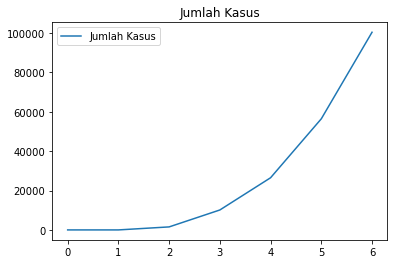

In [334]:
id = ByGroup_negara.get_group('Indonesia')
Bulan={}
for i in id['Date']:
    if '2020-01'in i:
        Bulan.update({'Jan':i})
    elif '2020-02'in i:
        Bulan.update({'Feb':i})
    elif '2020-03'in i:
        Bulan.update({'Mar':i})
    elif '2020-04'in i:
        Bulan.update({'Apr':i})
    elif '2020-05'in i:
        Bulan.update({'Mei':i})
    elif '2020-06'in i:
        Bulan.update({'Jun':i})
    elif '2020-07'in i:
        Bulan.update({'Jul':i})
    # Bulan.append({'Jumlah kasus':id[id['Date']==Bulan[i]]['Confirmed'].iloc[0]}})
jumkas=[]
jumkem=[]
jumsel=[]
jumkasak=[]
for i in Bulan:
    jumkas.append({'Bulan':i,'Jumlah Kasus':id[id['Date']==Bulan[i]]['Confirmed'].iloc[0]})
    jumkem.append({'Bulan':i,'Jumlah Kasus':id[id['Date']==Bulan[i]]['Deaths'].iloc[0]})
    jumsel.append({'Bulan':i,'Jumlah Kasus':id[id['Date']==Bulan[i]]['Recovered'].iloc[0]})
    jumkasak.append({'Bulan':i,'Jumlah Kasus':id[id['Date']==Bulan[i]]['Active'].iloc[0]})
jumkas=pd.DataFrame(jumkas)
jumkem=pd.DataFrame(jumkem)
jumsel=pd.DataFrame(jumsel)
jumkasak=pd.DataFrame(jumkasak)
jumkas.plot(kind='line',title='Jumlah Kasus')

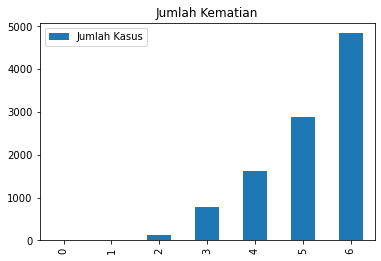

In [321]:
jumkem.plot(kind='bar',title='Jumlah Kematian')

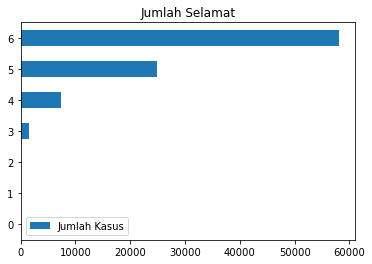

In [326]:
jumsel.plot(kind='barh',title='Jumlah Selamat')

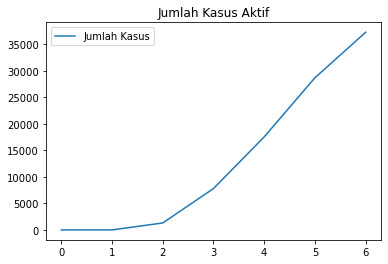

In [335]:
jumkasak.plot(kind='line',title='Jumlah Kasus Aktif')